In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

In [2]:
pd.options.display.max_columns = 30

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Australian Dataset/weatherAUS.csv")

In [5]:
df.shape

(145460, 23)

In [6]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,02-12-2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,03-12-2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,04-12-2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,05-12-2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [7]:
col = df.columns
col

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [9]:
df.describe(include='all')

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,145460,145460,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135134,135197.000000,134894,141232,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,142199,142193
unique,3436,49,NaN,NaN,NaN,NaN,NaN,16,NaN,16,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,12-11-2013,Canberra,NaN,NaN,NaN,NaN,NaN,W,NaN,N,SE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No
freq,49,3436,NaN,NaN,NaN,NaN,NaN,9915,NaN,11758,10838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110319,110316
mean,NaN,NaN,12.194034,23.221348,2.360918,5.468232,7.611178,NaN,40.035230,NaN,NaN,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,NaN,NaN
std,NaN,NaN,6.398495,7.119049,8.478060,4.193704,3.785483,NaN,13.607062,NaN,NaN,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,NaN,NaN
min,NaN,NaN,-8.500000,-4.800000,0.000000,0.000000,0.000000,NaN,6.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,NaN,NaN
25%,NaN,NaN,7.600000,17.900000,0.000000,2.600000,4.800000,NaN,31.000000,NaN,NaN,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,NaN,NaN
50%,NaN,NaN,12.000000,22.600000,0.000000,4.800000,8.400000,NaN,39.000000,NaN,NaN,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,NaN,NaN
75%,NaN,NaN,16.900000,28.200000,0.800000,7.400000,10.600000,NaN,48.000000,NaN,NaN,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,NaN,NaN


In [10]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Target Variable

In [11]:
df['RainTomorrow']

0          No
1          No
2          No
3          No
4          No
         ... 
145455     No
145456     No
145457     No
145458     No
145459    NaN
Name: RainTomorrow, Length: 145460, dtype: object

In [12]:
df['RainTomorrow'].isnull().sum()

3267

In [13]:
df['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [14]:
df['RainTomorrow'].value_counts()/len(df)

No     0.758394
Yes    0.219146
Name: RainTomorrow, dtype: float64

As we can see, Target variable data is highly imbalanced, we need to balance the data before we train the model, that we will see later

Now dropping the rows for which Target Variable is Null or NaN

In [15]:
df = df.dropna(subset = ["RainTomorrow"])
df.shape

(142193, 23)

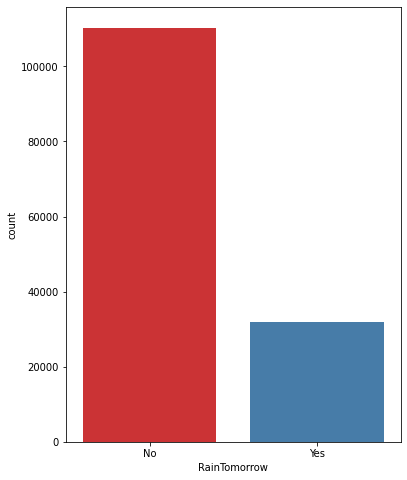

In [16]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="RainTomorrow", data=df, palette="Set1")
plt.show()

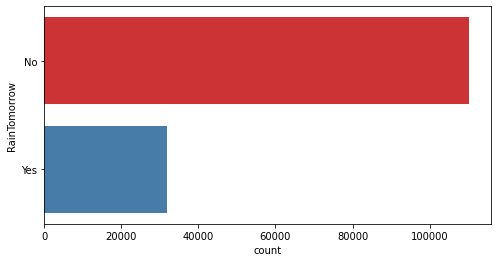

In [17]:
f, ax = plt.subplots(figsize=(8, 4))
ax = sns.countplot(y="RainTomorrow", data=df, palette="Set1")
plt.show()

In [18]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [19]:
categorical = [var for var in df.columns if df[var].dtype=='object']

print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :', categorical)

There are 7 categorical variables

The categorical variables are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [20]:
df[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,01-12-2008,Albury,W,W,WNW,No,No
1,02-12-2008,Albury,WNW,NNW,WSW,No,No
2,03-12-2008,Albury,WSW,W,WSW,No,No
3,04-12-2008,Albury,NE,SE,E,No,No
4,05-12-2008,Albury,W,ENE,NW,No,No


In [21]:
df[categorical].isnull().sum()

Date                0
Location            0
WindGustDir      9330
WindDir9am      10013
WindDir3pm       3778
RainToday        1406
RainTomorrow        0
dtype: int64

In [22]:
cat1 = [var for var in categorical if df[var].isnull().sum()!=0]
print(df[cat1].isnull().sum())

WindGustDir     9330
WindDir9am     10013
WindDir3pm      3778
RainToday       1406
dtype: int64


In [23]:
for var in categorical:
    print(var, ' contains ', len(df[var].unique()), ' labels')

Date  contains  3436  labels
Location  contains  49  labels
WindGustDir  contains  17  labels
WindDir9am  contains  17  labels
WindDir3pm  contains  17  labels
RainToday  contains  3  labels
RainTomorrow  contains  2  labels


In [24]:
df['Date'] = pd.to_datetime(df['Date'])

In [25]:
df['Year'] = df['Date'].dt.year
df['Year'].head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Year, dtype: int64

In [26]:
df['Month'] = df['Date'].dt.month
df['Month'].head()

0    1
1    2
2    3
3    4
4    5
Name: Month, dtype: int64

In [27]:
df['Day'] = df['Date'].dt.day
df['Day'].head()

0    12
1    12
2    12
3    12
4    12
Name: Day, dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           142193 non-null  datetime64[ns]
 1   Location       142193 non-null  object        
 2   MinTemp        141556 non-null  float64       
 3   MaxTemp        141871 non-null  float64       
 4   Rainfall       140787 non-null  float64       
 5   Evaporation    81350 non-null   float64       
 6   Sunshine       74377 non-null   float64       
 7   WindGustDir    132863 non-null  object        
 8   WindGustSpeed  132923 non-null  float64       
 9   WindDir9am     132180 non-null  object        
 10  WindDir3pm     138415 non-null  object        
 11  WindSpeed9am   140845 non-null  float64       
 12  WindSpeed3pm   139563 non-null  float64       
 13  Humidity9am    140419 non-null  float64       
 14  Humidity3pm    138583 non-null  float64       
 15  

In [29]:
df.drop('Date', axis=1, inplace = True)

In [30]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,2008,1,12
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2008,2,12
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,2008,3,12
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,2008,4,12
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008,5,12


In [31]:
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :', categorical)

There are 6 categorical variables

The categorical variables are : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [32]:
df[categorical].isnull().sum()

Location            0
WindGustDir      9330
WindDir9am      10013
WindDir3pm       3778
RainToday        1406
RainTomorrow        0
dtype: int64

In [33]:
print('Location contains', len(df.Location.unique()), 'labels')

Location contains 49 labels


In [34]:
df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [35]:
df.Location.value_counts()

Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Launceston          3028
Ballarat            3028
Albany              3016
Albury              3011
PerthAirport        3009
MelbourneAirport    3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cairns              2988
Cobar               2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
Penrith             2964
NorfolkIsland       2964
SalmonGums          2955
Newcastle           2955
CoffsHarbour        2953
Witchcliffe         2952
Richmond            2951
Dartmoor            2943
NorahHead           2929
BadgerysCreek       2928


In [36]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,2008,1,12
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2008,2,12
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,2008,3,12
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,2008,4,12
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008,5,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No,2017,6,20
145455,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No,2017,6,21
145456,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No,2017,6,22
145457,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No,2017,6,23


In [37]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [38]:
# pd.get_dummies(df.Location, drop_first=True).head()

In [39]:
# pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).head()

In [40]:
# pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).sum(axis=0)

In [41]:
def create_dummies(df):
    for i in df.columns:
        if df[i].dtypes=='object':
            print(i,'encoded')
            mask = ~df[i].isnull()
            label_encoder = LabelEncoder() 
            try:
                df[i][mask] = label_encoder.fit_transform(df[i][mask])
                df[i] = df[i].astype(int)
            except Exception as e:
                print(e)
    return df

In [42]:
df = create_dummies(df)

Location encoded
WindGustDir encoded
cannot convert float NaN to integer
WindDir9am encoded
cannot convert float NaN to integer
WindDir3pm encoded
cannot convert float NaN to integer
RainToday encoded
cannot convert float NaN to integer
RainTomorrow encoded


In [43]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2,13.4,22.9,0.6,NaN,NaN,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0,2008,1,12
1,2,7.4,25.1,0.0,NaN,NaN,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0,2008,2,12
2,2,12.9,25.7,0.0,NaN,NaN,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0,2008,3,12
3,2,9.2,28.0,0.0,NaN,NaN,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0,2008,4,12
4,2,17.5,32.3,1.0,NaN,NaN,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,2008,5,12


In [44]:
numerical = [var for var in df.columns if df[var].dtype!='object']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 21 numerical variables

The numerical variables are : ['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainTomorrow', 'Year', 'Month', 'Day']


In [45]:
df[numerical].head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow,Year,Month,Day
0,2,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,2008,1,12
1,2,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,2008,2,12
2,2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,2008,3,12
3,2,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,2008,4,12
4,2,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,2008,5,12


Text(0, 0.5, 'RainTomorrow')

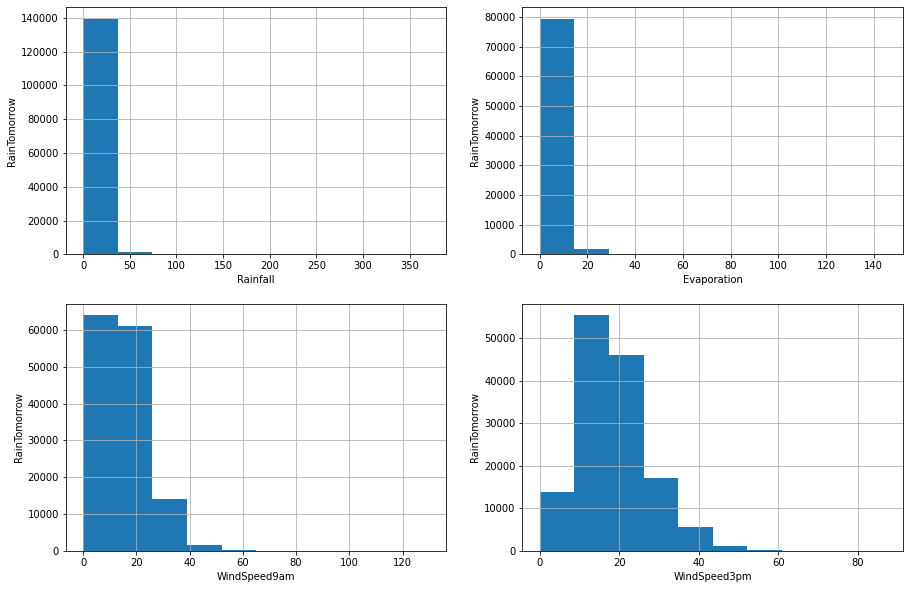

In [46]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = df.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')

plt.subplot(2, 2, 2)
fig = df.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')

plt.subplot(2, 2, 3)
fig = df.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')

plt.subplot(2, 2, 4)
fig = df.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

Text(0, 0.5, 'WindSpeed3pm')

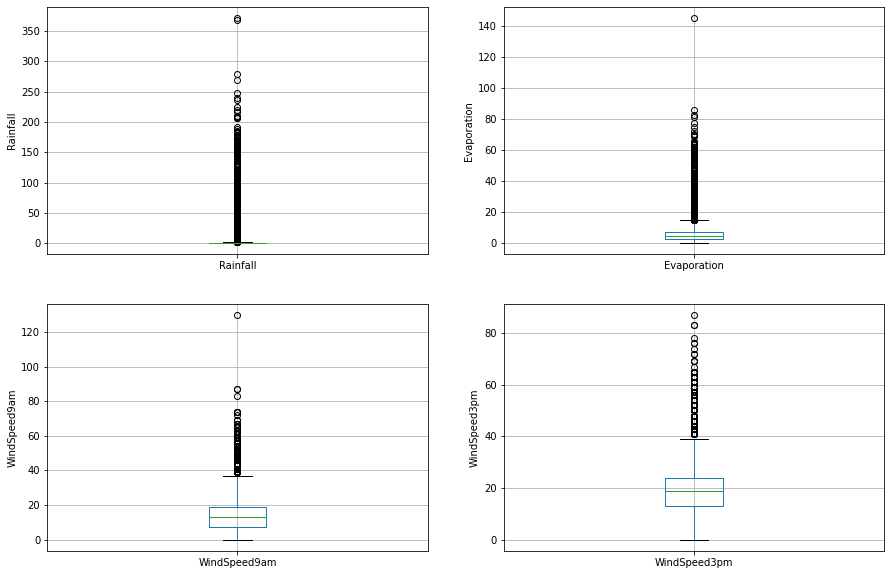

In [47]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')

plt.subplot(2, 2, 2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')

plt.subplot(2, 2, 3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')

plt.subplot(2, 2, 4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

In [48]:
IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
Lower_fence = df.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = df.Rainfall.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Rainfall outliers are values < -2.4000000000000004 or > 3.2


In [49]:
IQR = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
Lower_fence = df.Evaporation.quantile(0.25) - (IQR * 3)
Upper_fence = df.Evaporation.quantile(0.75) + (IQR * 3)
print('Evaporation outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Evaporation outliers are values < -11.800000000000002 or > 21.800000000000004


In [50]:
IQR = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
Lower_fence = df.WindSpeed9am.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed9am.quantile(0.75) + (IQR * 3)
print('WindSpeed9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

WindSpeed9am outliers are values < -29.0 or > 55.0


In [51]:
IQR = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
Lower_fence = df.WindSpeed3pm.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print('WindSpeed3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

WindSpeed3pm outliers are values < -20.0 or > 57.0


In [52]:
correlation = df.corr()

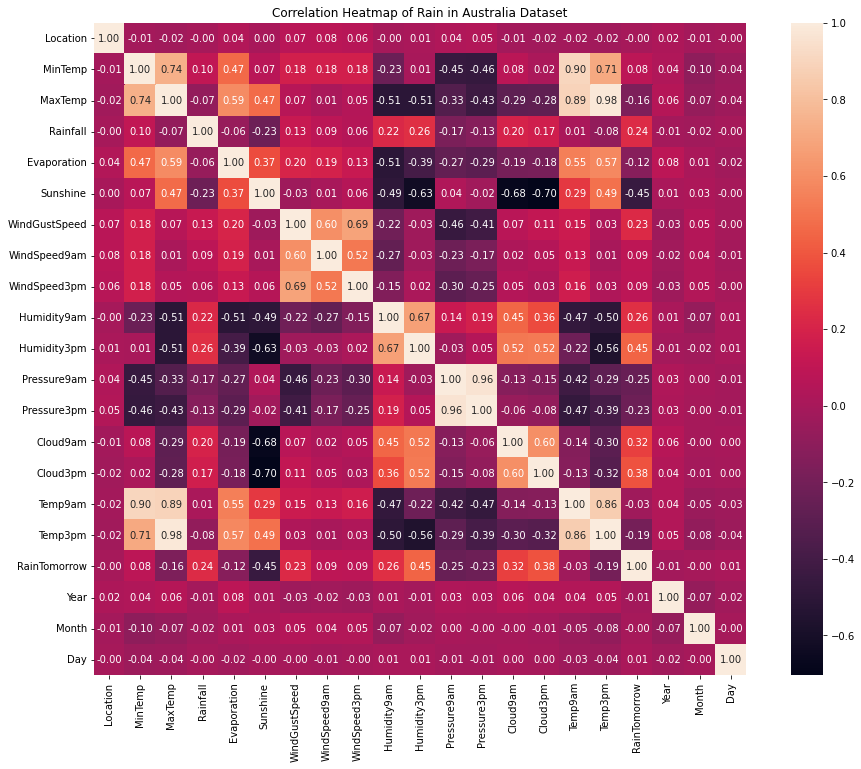

In [53]:
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Rain in Australia Dataset')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)           
plt.show()

In [54]:
num_var = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'WindGustSpeed', 'WindSpeed3pm', 'Pressure9am', 'Pressure3pm']

In [55]:
# sns.pairplot(df[num_var], kind='scatter', diag_kind='hist', palette='Rainbow')
# plt.show()

In [56]:
def impute_mean(impupte_mean_list):
    for value in impute_mean_list:
        df[value] = df[value].fillna(df[value].mean())

In [57]:
df.isnull().sum()

Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
Year                 0
Month                0
Day                  0
dtype: int64

In [58]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2,13.4,22.9,0.6,NaN,NaN,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0,2008,1,12
1,2,7.4,25.1,0.0,NaN,NaN,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0,2008,2,12
2,2,12.9,25.7,0.0,NaN,NaN,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0,2008,3,12
3,2,9.2,28.0,0.0,NaN,NaN,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0,2008,4,12
4,2,17.5,32.3,1.0,NaN,NaN,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,2008,5,12


In [59]:
impute_mean_list = ['Location',	'MinTemp', 'MaxTemp',	'Rainfall',	'Evaporation',	'Sunshine',	'WindGustDir',	'WindGustSpeed',	'WindDir9am',	'WindDir3pm',	'WindSpeed9am',	'WindSpeed3pm',	'Humidity9am',	'Humidity3pm',	'Pressure9am',	'Pressure3pm',	'Cloud9am',	'Cloud3pm',	'Temp9am',	'Temp3pm',	'RainToday',	'RainTomorrow',	'Year',	'Month',	'Day']
impute_mean(impute_mean_list)


In [60]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Day              0
dtype: int64

In [61]:
array = df.values

X = array[:,0:24]
Y = array[:,24]
# feature extraction
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=10)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:25,:])

[1.6823024068e-01 8.2355355288e+02 8.8920424751e+02 9.8746634043e+00
 2.9135327063e+02 8.7663311689e+01 1.9424316294e+01 7.6818229224e+01
 1.8118017453e+01 1.5158782485e+01 3.4553777905e+01 6.0407977219e+01
 1.7728253576e+02 8.1104432161e+01 3.1407561868e+02 2.9507842528e+02
 1.1430055357e+01 8.9253991622e+00 8.7740259048e+02 8.1029030590e+02
 1.0130235745e+01 9.7433399281e+00 3.1970025904e+01 3.1376003988e+00]
[[13.4 22.9 16.9 21.8]
 [ 7.4 25.1 17.2 24.3]
 [12.9 25.7 21.  23.2]
 [ 9.2 28.  18.1 26.5]
 [17.5 32.3 17.8 29.7]
 [14.6 29.7 20.6 28.9]
 [14.3 25.  18.1 24.6]
 [ 7.7 26.7 16.3 25.5]
 [ 9.7 31.9 18.3 30.2]
 [13.1 30.1 20.1 28.2]
 [13.4 30.4 20.4 28.8]
 [15.9 21.7 15.9 17. ]
 [15.9 18.6 17.4 15.8]
 [12.6 21.  15.8 19.8]
 [ 9.8 27.7 17.3 26.2]
 [14.1 20.9 17.2 18.1]
 [13.5 22.9 18.  21.5]
 [11.2 22.5 15.5 21. ]
 [ 9.8 25.6 15.8 23.2]
 [11.5 29.3 19.1 27.3]
 [17.1 33.  24.5 31.6]
 [20.5 31.8 23.8 30.8]
 [15.3 30.9 20.9 29. ]
 [12.6 32.4 21.5 31.2]
 [16.2 33.9 23.2 33. ]]


In [62]:
# from pandas import read_csv
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LogisticRegression

# array = df.values
# X = array[:,0:24]
# Y = array[:,24]
# # feature extraction
# model = LogisticRegression(solver='lbfgs')
# rfe = RFE(model)
# fit = rfe.fit(X, Y)
# print("Num Features: %d" % fit.n_features_)
# print("Selected Features: %s" % fit.support_)
# print("Feature Ranking: %s" % fit.ranking_)

In [63]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2,13.4,22.9,0.6,5.469824,7.624853,13.0,44.0,13.0,14.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,0.0,0,2008,1,12
1,2,7.4,25.1,0.0,5.469824,7.624853,14.0,44.0,6.0,15.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,0.0,0,2008,2,12
2,2,12.9,25.7,0.0,5.469824,7.624853,15.0,46.0,13.0,15.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,0.0,0,2008,3,12
3,2,9.2,28.0,0.0,5.469824,7.624853,4.0,24.0,9.0,0.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,0.0,0,2008,4,12
4,2,17.5,32.3,1.0,5.469824,7.624853,13.0,41.0,1.0,7.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0,2008,5,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,41,3.5,21.8,0.0,5.469824,7.624853,0.0,31.0,2.0,0.0,15.0,13.0,59.0,27.0,1024.7,1021.2,4.437189,4.503167,9.4,20.9,0.0,0,2017,6,20
145455,41,2.8,23.4,0.0,5.469824,7.624853,0.0,31.0,9.0,1.0,13.0,11.0,51.0,24.0,1024.6,1020.3,4.437189,4.503167,10.1,22.4,0.0,0,2017,6,21
145456,41,3.6,25.3,0.0,5.469824,7.624853,6.0,22.0,9.0,3.0,13.0,9.0,56.0,21.0,1023.5,1019.1,4.437189,4.503167,10.9,24.5,0.0,0,2017,6,22
145457,41,5.4,26.9,0.0,5.469824,7.624853,3.0,37.0,9.0,14.0,9.0,9.0,53.0,24.0,1021.0,1016.8,4.437189,4.503167,12.5,26.1,0.0,0,2017,6,23


In [64]:
newdf = df

UniVariate Feature Selection

In [65]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

X = df.drop(columns=["RainTomorrow"])
y = df['RainTomorrow']

uni = SelectKBest(score_func = f_classif, k = 15)
fit = uni.fit(X, y)

X.columns[fit.get_support(indices=True)].tolist()

['MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp3pm',
 'RainToday']

Correlation Based Feature Selection

In [66]:
cor = df.corr()
cor_target = abs(cor["RainTomorrow"])
relevant_features = cor_target[cor_target > 0.2]
relevant_features.index

Index(['Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')

Wrapper Mehtod for Feature Selection

In [67]:
import statsmodels.api as sm
X_new = sm.add_constant(X)
model = sm.OLS(y, X_new).fit()
model.pvalues

const             1.935588e-31
Location          7.514928e-04
MinTemp           3.635699e-08
MaxTemp           2.337959e-02
Rainfall          1.000555e-57
Evaporation       2.693771e-06
Sunshine          0.000000e+00
WindGustDir       1.733351e-03
WindGustSpeed     0.000000e+00
WindDir9am        8.412532e-33
WindDir3pm        9.714631e-12
WindSpeed9am      2.190267e-02
WindSpeed3pm     4.470357e-201
Humidity9am       1.495870e-12
Humidity3pm       0.000000e+00
Pressure9am      2.463795e-197
Pressure3pm       0.000000e+00
Cloud9am          3.369821e-06
Cloud3pm          2.056874e-86
Temp9am           1.151253e-03
Temp3pm           1.141959e-18
RainToday         0.000000e+00
Year              5.570250e-01
Month             8.913735e-01
Day               4.327697e-01
dtype: float64

In [68]:
selected_features = list(X.columns)
pmax = 1
while (len(selected_features)>0):
    p= []
    X_new = X[selected_features]
    X_new = sm.add_constant(X_new)
    model = sm.OLS(y,X_new).fit()
    p = pd.Series(model.pvalues.values[1:],index = selected_features)      
    pmax = max(p)
    feature_pmax = p.idxmax()
    if(pmax>0.1):
        selected_features.remove(feature_pmax)
    else:
        break
selected_features

['Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday']

Univariate Selection

In [77]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

cols = df.columns

scaler = MinMaxScaler()
df2 = scaler.fit_transform(df)

df3 = pd.DataFrame(df2, columns=[cols])

#data = pd.read_csv("D://Blogs//train.csv")
X = df3.drop(columns=["RainTomorrow"])
y = df3['RainTomorrow']    #target column i.e price range
#apply SelectKBest class to extract top 10 best features

bestfeatures = SelectKBest(score_func=chi2, k=18)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfpvalue = pd.DataFrame(fit.pvalues_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores,dfpvalue],axis=1)
featureScores.columns = ['Specs','Score', 'pValue']  #naming the dataframe columns
# print(featureScores.nlargest(18,'Score', 'pValue'))  #print 10 best features
print(featureScores)
print("Largest 16: ")
print(featureScores.nlargest(16,'Score'))  #print 10 best features

               Specs         Score         pValue
0        (Location,)      0.324026   5.691982e-01
1         (MinTemp,)     46.377883   9.750995e-12
2         (MaxTemp,)    122.687226   1.632590e-28
3        (Rainfall,)    649.275220  3.211712e-143
4     (Evaporation,)     14.430419   1.454341e-04
5        (Sunshine,)   1028.820450  9.768482e-226
6     (WindGustDir,)     58.103957   2.486257e-14
7   (WindGustSpeed,)    284.102581   9.585072e-64
8      (WindDir9am,)     24.726648   6.606441e-07
9      (WindDir3pm,)     22.040592   2.669449e-06
10   (WindSpeed9am,)     50.148701   1.425255e-12
11   (WindSpeed3pm,)     50.382904   1.264914e-12
12    (Humidity9am,)    481.974085  7.946742e-107
13    (Humidity3pm,)   2250.868368   0.000000e+00
14    (Pressure9am,)    157.679498   3.636408e-36
15    (Pressure3pm,)    122.689686   1.630568e-28
16       (Cloud9am,)   1190.567067  6.844558e-261
17       (Cloud3pm,)   1415.977529  7.087482e-310
18        (Temp9am,)      3.399848   6.520243e-02


Feature Importance

[0.0314593896 0.0360012019 0.0364981855 0.0296817093 0.024167526
 0.0571747743 0.031353604  0.0487110724 0.0321115156 0.0322706082
 0.0313927771 0.0327769652 0.0476189455 0.1307442394 0.0438425442
 0.0492414687 0.0325863882 0.0487583178 0.0338089041 0.036802092
 0.0596388364 0.0307486454 0.0309494122 0.0316608767]


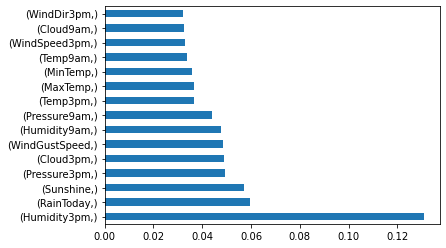

In [72]:
import pandas as pd
import numpy as np
#data = pd.read_csv("D://Blogs//train.csv")

# X = df3.drop(columns=["RainTomorrow"])
# y = df3['RainTomorrow']    #target column i.e price range

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [ ]:
df["RainTomorrow"].value_counts()

0    110316
1     31877
Name: RainTomorrow, dtype: int64

In [ ]:
from sklearn.utils import resample

df_majority = df[(df['RainTomorrow']==0)] 
df_minority = df[(df['RainTomorrow']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_majority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 31877, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_minority])

In [ ]:
df_upsampled["RainTomorrow"].value_counts()

0    31877
1    31877
Name: RainTomorrow, dtype: int64

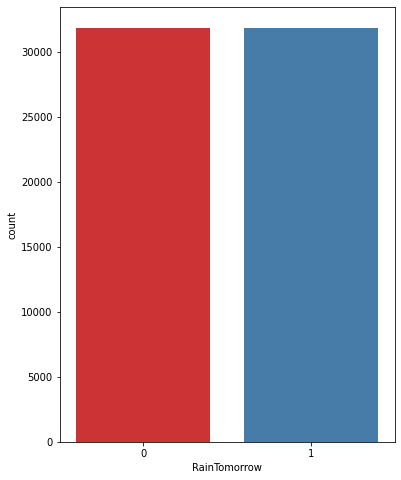

In [ ]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="RainTomorrow", data=df_upsampled, palette="Set1")
plt.show()

In [ ]:
# from sklearn.utils import resample
# #create two different dataframe of majority and minority class 
# df_majority = df[(df['RainTomorrow'] == 0)] 
# df_minority = df[(df['RainTomorrow'] == 1)] 
# # upsample minority class
# df_minority_upsampled = resample(df_majority, 
#                                  replace=True,    # sample with replacement
#                                  n_samples= 31877, # to match majority class
#                                  random_state=42)  # reproducible results
# # Combine majority class with upsampled minority class
# df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [ ]:
# df_upsampled['RainTomorrow'].value_counts()

In [ ]:
X = df.drop(['RainTomorrow'], axis=1)
y = df['RainTomorrow']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
X_train.shape, X_test.shape

((106644, 24), (35549, 24))

In [ ]:
# def max_value(df3, variable, top):
#     return np.where(df3[variable]>top, top, df3[variable])

# for df3 in [X_train, X_test]:
#     df3['Rainfall'] = max_value(df3, 'Rainfall', 3.2)
#     df3['Evaporation'] = max_value(df3, 'Evaporation', 21.8)
#     df3['WindSpeed9am'] = max_value(df3, 'WindSpeed9am', 55)
#     df3['WindSpeed3pm'] = max_value(df3, 'WindSpeed3pm', 57)

In [ ]:
# X_train.Rainfall.max(), X_test.Rainfall.max()

In [ ]:
# Create confusion matrix function to find out sensitivity and specificity
from sklearn.metrics import confusion_matrix
def draw_cm(actual, predicted):
    cm = confusion_matrix( actual, predicted, labels = [1,0]).T
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Yes","No"] , yticklabels = ["Yes","No"] )
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    plt.show()

Logistic regression

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Importing libraries
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from datetime import datetime
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 500)

K-NN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

# Hyperparameter Optimization
# parameters = {'n_neighbors': [3, 4, 5, 10], 
#               'weights': ['uniform', 'distance'],
#               'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
#               'leaf_size' : [10, 20, 30, 50]
#              }

# # Run the grid search
# grid_obj = GridSearchCV(knn, parameters)
# grid_obj = grid_obj.fit(X_train, y_train)

# # Set the knn to the best combination of parameters
# knn = grid_obj.best_estimator_

# Train the model using the training sets 
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
# Prediction on test data
y_pred = knn.predict(X_test)

In [ ]:
# Calculating the accuracy, precision and the recall
acc_knn = round( metrics.accuracy_score(y_test, y_pred), 3)
print( 'Total Accuracy : ', acc_knn )

Total Accuracy :  0.827


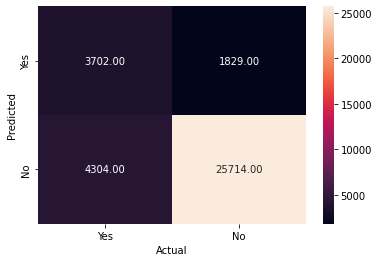

In [ ]:
# Confusion matrix 
draw_cm(y_test, y_pred)

In [ ]:
knnf1 = round(f1_score(y_test, y_pred, average='weighted'), 3)
knn_precision = round(precision_score(y_test, y_pred), 3)
knn_recall = round(recall_score(y_test, y_pred), 3)

Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic regression classifier
logreg = LogisticRegression()

# Train the model using the training sets 
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Prediction on test data
y_pred = logreg.predict(X_test)

In [ ]:
# Calculating the accuracy, precision and the recall
acc_logreg = round( metrics.accuracy_score(y_test, y_pred), 2 )
print( 'Total Accuracy : ', acc_logreg )

Total Accuracy :  0.84


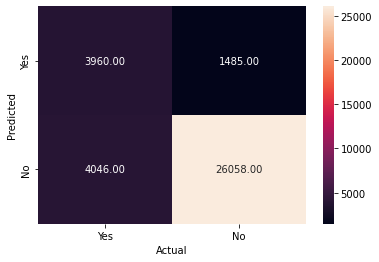

In [ ]:
# Confusion matrix 
draw_cm(y_test, y_pred)

In [ ]:
lrf1 = round(f1_score(y_test, y_pred, average='weighted'), 3)
lr_precision = round(precision_score(y_test, y_pred), 3)
lr_recall = round(recall_score(y_test, y_pred), 3)

Gaussian NB

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets 
model.fit(X_train,y_train)

GaussianNB()

In [ ]:
# Prediction on test set
y_pred = model.predict(X_test)

In [ ]:
# Calculating the accuracy, precision and the recall
acc_nb = round( metrics.accuracy_score(y_test, y_pred), 2 )
print( 'Total Accuracy : ', acc_nb )

Total Accuracy :  0.81


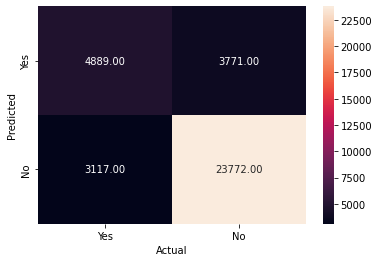

In [ ]:
# Confusion matrix 
draw_cm(y_test, y_pred)

In [ ]:
gnbf1 = round(f1_score(y_test, y_pred, average='weighted'), 3)
gnb_precision = round(precision_score(y_test, y_pred), 3)
gnb_recall = round(recall_score(y_test, y_pred), 3)

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf = RandomForestClassifier()

# Hyperparameter Optimization
# parameters = {'n_estimators': [4, 6, 9, 10, 15], 
#               'max_features': ['log2', 'sqrt','auto'], 
#               'criterion': ['entropy', 'gini'],
#               'max_depth': [2, 3, 5, 10], 
#               'min_samples_split': [2, 3, 5],
#               'min_samples_leaf': [1, 5, 8]
#              }

# # Run the grid search
# grid_obj = GridSearchCV(rf, parameters)
# grid_obj = grid_obj.fit(X_train, y_train)

# # Set the rf to the best combination of parameters
# rf = grid_obj.best_estimator_

# Train the model using the training sets 
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
# Prediction on test data
y_pred = rf.predict(X_test)

In [ ]:
# Calculating the accuracy, precision and the recall
acc_rf = round( metrics.accuracy_score(y_test, y_pred), 2)
print('Total Accuracy : ', acc_rf)

Total Accuracy :  0.86


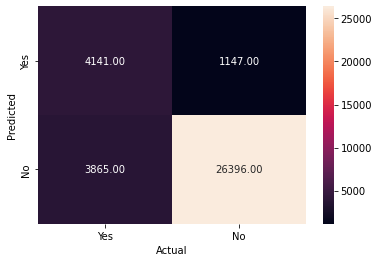

In [ ]:
# Confusion matrix 
draw_cm(y_test, y_pred)

In [ ]:
rff1 = round(f1_score(y_test, y_pred, average='weighted'), 3)
rf_precision = round(precision_score(y_test, y_pred), 3)
rf_recall = round(recall_score(y_test, y_pred), 3)

In [ ]:
# # Creating scaled set to be used in model to improve the results
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

SVM

In [ ]:
from sklearn import svm

svc = svm.SVC()

# Hyperparameter Optimization
# parameters = [
#   {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
#   {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
# ]

# # Run the grid search
# grid_obj = GridSearchCV(svc, parameters)
# grid_obj = grid_obj.fit(X_train, y_train)

# # Set the svc to the best combination of parameters
# svc = grid_obj.best_estimator_

# Train the model using the training sets 
svc.fit(X_train,y_train)

SVC()

In [ ]:
# Prediction on test data
y_pred = svc.predict(X_test)

In [ ]:
# Calculating the accuracy, precision and the recall
acc_svm = round( metrics.accuracy_score(y_test, y_pred), 2 )
print( 'Total Accuracy : ', acc_svm )

Total Accuracy :  0.85


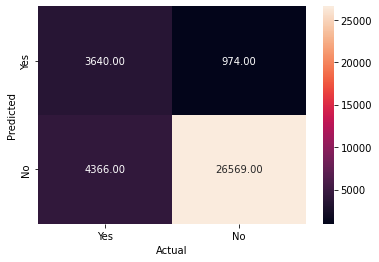

In [ ]:
# Confusion matrix 
draw_cm(y_test, y_pred)

In [ ]:
svmf1 = round(f1_score(y_test, y_pred, average='weighted'), 3)
svm_precision = round(precision_score(y_test, y_pred), 3)
svm_recall = round(recall_score(y_test, y_pred), 3)

Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision tree classifier model
clf = DecisionTreeClassifier()

# Hyperparameter Optimization
# parameters = [{'max_features': ['log2', 'sqrt','auto'], 
#               'criterion': ['entropy', 'gini'],
#               'max_depth': [2, 3, 5, 10, 50], 
#               'min_samples_split': [2, 3, 50, 100],
#               'min_samples_leaf': [1, 5, 8, 10]
#              }]
# # Run the grid search
# grid_obj = GridSearchCV(clf, parameters)
# grid_obj = grid_obj.fit(X_train, y_train)

# # Set the clf to the best combination of parameters
# clf = grid_obj.best_estimator_

# Train the model using the training sets 
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Model prediction on train data
y_pred = clf.predict(X_train)

In [ ]:
# Prediction on test set
y_pred = clf.predict(X_test)

In [ ]:
# Calculating the accuracy, precision and the recall
acc_dt = round(metrics.accuracy_score(y_test, y_pred), 2)
print('Total Accuracy : ', acc_dt)

Total Accuracy :  0.79


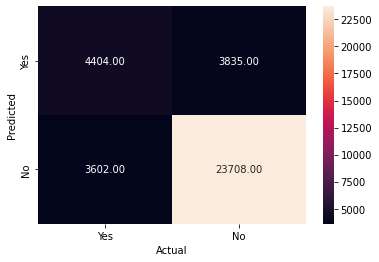

In [ ]:
# Confusion matrix 
draw_cm(y_test, y_pred)

In [ ]:
dtf1 = round(f1_score(y_test, y_pred, average='weighted'), 3)
dt_precision = round(precision_score(y_test, y_pred), 3)
dt_recall = round(recall_score(y_test, y_pred), 3)

In [ ]:
from xgboost import XGBClassifier, plot_importance

# Create a XGB Classifier
gbm = XGBClassifier(learning_rate=0.02, n_estimators=100, objective='multi:softmax', silent=True, nthread=1, num_class=5)

# # A parameter grid for XGBoost for Hyperparameter Optimization
# parameters = {
#         'min_child_weight': [1, 5, 10],
#         'gamma': [0.1, 0.5, 1, 1.5, 2, 5],
#         'subsample': [0.6, 0.8, 1.0],
#         'colsample_bytree': [0.6, 0.8, 1.0],
#         'max_depth': [3, 5, 6]
#         }

# # Run the grid search
# grid_obj = GridSearchCV(gbm, parameters)
# grid_obj = grid_obj.fit(X_train, y_train)

# # Set the rf to the best combination of parameters
# gbm = grid_obj.best_estimator_

# Train the model using the training sets
gbm.fit(X_train, y_train)

XGBClassifier(learning_rate=0.02, nthread=1, num_class=5,
              objective='multi:softmax', silent=True)

In [ ]:
y_pred = gbm.predict(X_test)

In [ ]:
# Calculating the accuracy, precision and the recall
acc_xgb = round( metrics.accuracy_score(y_test, y_pred), 3)
print( 'Total Accuracy : ', acc_xgb )

Total Accuracy :  0.841


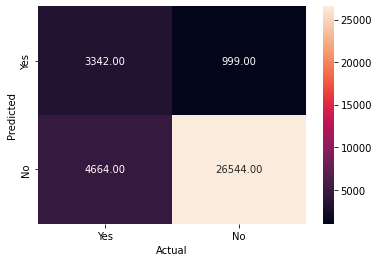

In [ ]:
# Confusion matrix 
draw_cm(y_test, y_pred)

In [ ]:
xgf1 = f1_score(y_test, y_pred, average='weighted')
xg_precision = round(precision_score(y_test, y_pred), 3)
xg_recall = round(recall_score(y_test, y_pred), 3)

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 
              'K - Nearest Neighbors', 'XGBoost'],
    'Score': [acc_logreg, acc_nb, acc_dt, acc_rf, acc_svm, acc_knn, acc_xgb], 
    'F1Score': [lrf1, gnbf1, dtf1, rff1, svmf1, knnf1, xgf1], 
    'Precision': [lr_precision, gnb_precision, dt_precision, rf_precision, svm_precision, knn_precision, xg_precision], 
    'Recall': [lr_recall, gnb_recall, dt_recall, rf_recall, svm_recall, knn_recall, xg_recall]})
models.sort_values(by='Score', ascending=False)

,Model,Score,F1Score,Precision,Recall
3,Random Forest,0.860,0.848000,0.783,0.517
4,Support Vector Machines,0.850,0.834000,0.789,0.455
6,XGBoost,0.841,0.822025,0.770,0.417
0,Logistic Regression,0.840,0.833000,0.727,0.495
5,K - Nearest Neighbors,0.827,0.815000,0.669,0.462
1,Naive Bayes,0.810,0.809000,0.565,0.611
2,Decision Tree,0.790,0.792000,0.535,0.550


In [78]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2,13.4,22.9,0.6,5.469824,7.624853,13.0,44.0,13.0,14.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,0.0,0,2008,1,12
1,2,7.4,25.1,0.0,5.469824,7.624853,14.0,44.0,6.0,15.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,0.0,0,2008,2,12
2,2,12.9,25.7,0.0,5.469824,7.624853,15.0,46.0,13.0,15.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,0.0,0,2008,3,12
3,2,9.2,28.0,0.0,5.469824,7.624853,4.0,24.0,9.0,0.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,0.0,0,2008,4,12
4,2,17.5,32.3,1.0,5.469824,7.624853,13.0,41.0,1.0,7.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0,2008,5,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,41,3.5,21.8,0.0,5.469824,7.624853,0.0,31.0,2.0,0.0,15.0,13.0,59.0,27.0,1024.7,1021.2,4.437189,4.503167,9.4,20.9,0.0,0,2017,6,20
145455,41,2.8,23.4,0.0,5.469824,7.624853,0.0,31.0,9.0,1.0,13.0,11.0,51.0,24.0,1024.6,1020.3,4.437189,4.503167,10.1,22.4,0.0,0,2017,6,21
145456,41,3.6,25.3,0.0,5.469824,7.624853,6.0,22.0,9.0,3.0,13.0,9.0,56.0,21.0,1023.5,1019.1,4.437189,4.503167,10.9,24.5,0.0,0,2017,6,22
145457,41,5.4,26.9,0.0,5.469824,7.624853,3.0,37.0,9.0,14.0,9.0,9.0,53.0,24.0,1021.0,1016.8,4.437189,4.503167,12.5,26.1,0.0,0,2017,6,23


UnderSampling

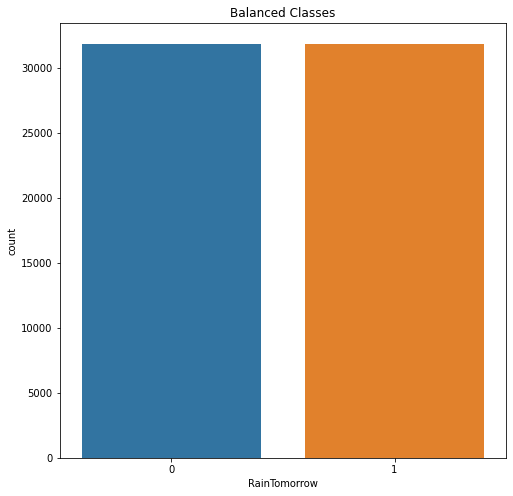

In [81]:
shuffled_df = df.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
yes_df = shuffled_df.loc[shuffled_df['RainTomorrow'] == 1]

#Randomly select 492 observations from the non-fraud (majority class)
no_df = shuffled_df.loc[shuffled_df['RainTomorrow'] == 0].sample(n=31877,random_state=42)

# Concatenate both dataframes again
normalized_df = pd.concat([yes_df, no_df])

#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot('RainTomorrow', data = normalized_df)
plt.title('Balanced Classes')
plt.show()

OverSampling

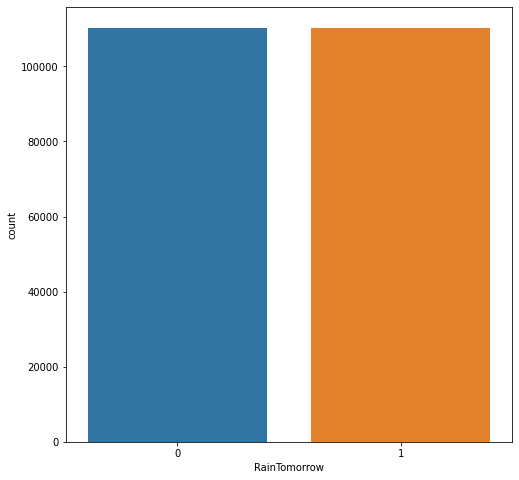

In [92]:
from imblearn.over_sampling import SMOTE

# Resample the minority class. You can change the strategy to 'auto' if you are not sure.
sm = SMOTE(sampling_strategy='minority', random_state=7)

# Fit the model to generate the data.
oversampled_trainX, oversampled_trainY = sm.fit_resample(df.drop('RainTomorrow', axis=1), df['RainTomorrow'])
oversampled_train = pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)], axis=1)
#oversampled_train.columns = normalized_df.columns

plt.figure(figsize=(8, 8))
sns.countplot(oversampled_train['RainTomorrow'])
# plt.title('Balanced Classes')
# plt.show()

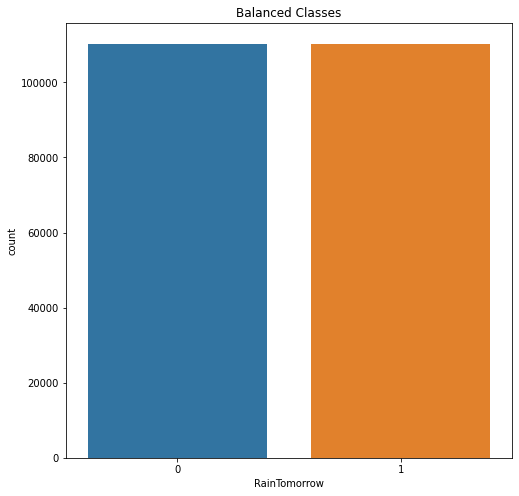

In [91]:
from imblearn.over_sampling import SMOTE
# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(df.drop('RainTomorrow', axis=1), df['RainTomorrow'])
oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

plt.figure(figsize=(8, 8))
sns.countplot('RainTomorrow', data = oversampled)
plt.title('Balanced Classes')
plt.show()

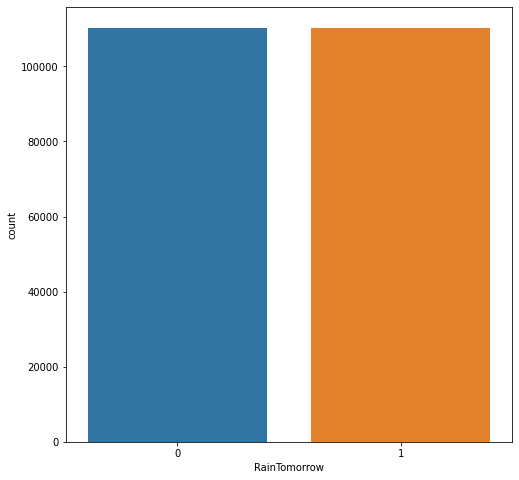

In [88]:
# from sklearn.utils import resample

# df_majority = df[(df['RainTomorrow']==0)] 
# df_minority = df[(df['RainTomorrow']==1)] 
# # upsample minority class
# df_minority_upsampled = resample(df_minority, 
#                                  replace=True,    # sample with replacement
#                                  n_samples= 110316, # to match majority class
#                                  random_state=42)  # reproducible results
# # Combine majority class with upsampled minority class
# plt.figure(figsize=(8, 8))
# df_upsampled = pd.concat([df_minority_upsampled, df_majority])
# sns.countplot(df_upsampled['RainTomorrow'])